In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# PCA로 Dimension Reduce 했을때, 차원의 수 n 선정 

In [2]:
x = pd.read_csv('./features_reduced_imputed.csv')
x.drop(['Unnamed: 0'], axis = 1, inplace = True)

y = pd.read_csv('./target.csv')
y = y['LET_IS']

In [9]:
li = ['AGE', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE'] #나머지 continues variable은 상관관계에서 drop된걸로 보임

for column in li:
    series = x[column]
    array = series.values
    array_reshaped = array.reshape(-1, 1)    
    #MinMaxScaler , StandardScaler
    scaler = StandardScaler()
    normalized_array = scaler.fit_transform(array_reshaped)
    normalized_array_1d = normalized_array.flatten()
    x[column] = normalized_array_1d

In [10]:
print(min(x['AGE']), max(x['AGE']))

#x['K_BLOOD']
#use z-score : 26, 92 -> -3.191272946612637 2.6818887152087494

-3.1912729466126373 2.6818887152087485


0 :  0
1 :  0.30388710107696454
2 :  0.45968293774187163
3 :  0.5221920749847515
4 :  0.5718245560359986
5 :  0.6158045700990644
6 :  0.6551208500061527
7 :  0.6888460486290767
8 :  0.7210676370148369
9 :  0.7503316609931946
10 :  0.77566426237077
11 :  0.7956865309891685
12 :  0.8149564383972348
13 :  0.8316412569368004
14 :  0.847433794495768
15 :  0.8621819549406641
16 :  0.8765169609119794
17 :  0.8869625967238469
18 :  0.8965425079041357
19 :  0.904977261390332
20 :  0.913094856089684
21 :  0.9203794824866943
22 :  0.9267666928430105
23 :  0.9325634115501311
24 :  0.9377719597373737
25 :  0.9423640493243416
26 :  0.946721813204088
27 :  0.950665418769722
28 :  0.9543909376203139
29 :  0.9580405063092832
30 :  0.9614547654791742
31 :  0.9641714848761028
32 :  0.9664769371372224
33 :  0.9686369806845118
34 :  0.9706881878559754
35 :  0.9725655793243277
36 :  0.97435944107905
37 :  0.9759864935705997
38 :  0.9775786728144263
39 :  0.9789542334297407
40 :  0.9803204042172072
41 :  0.9

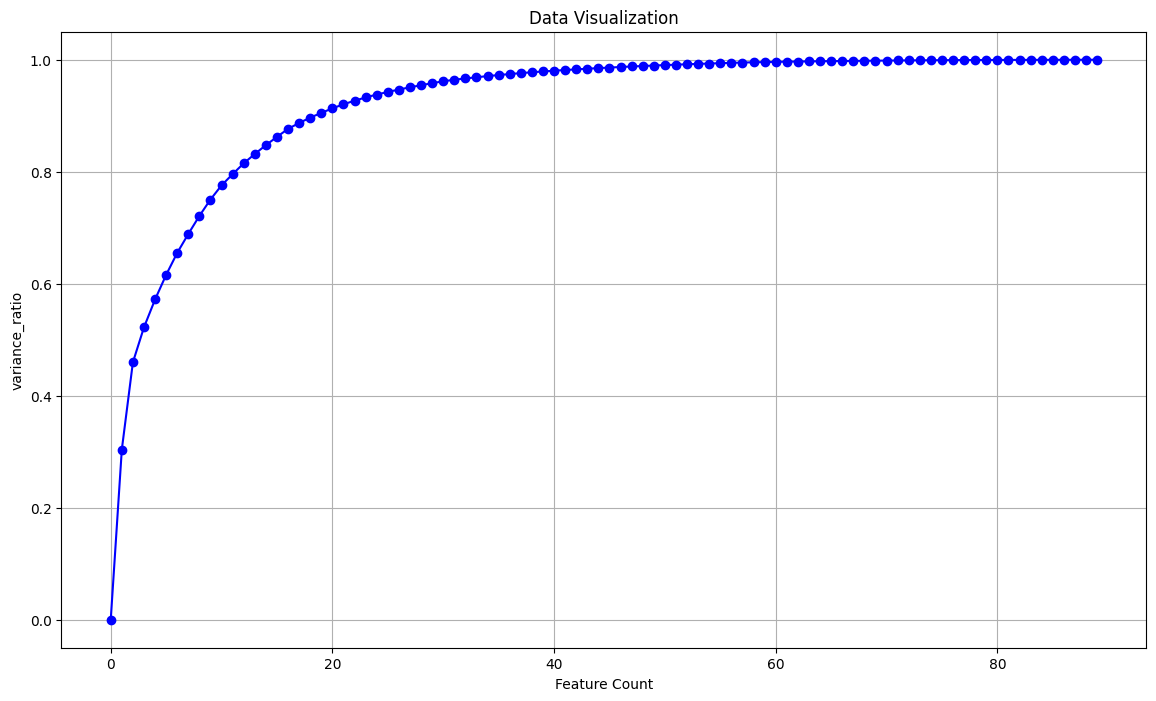

In [11]:
pca_li = [0]

for i in range(1, 90):
    pca = PCA(n_components = i)
    pca.fit(x)
    #print(f'Feature {i} : {pca.explained_variance_ratio_}')
    pca_li.append(sum(pca.explained_variance_ratio_))
   
#print(pca_li) 

for i in range(len(pca_li)):
    print(f"{i} : ", pca_li[i])
    
plt.figure(figsize=(14, 8))
plt.plot(pca_li, marker='o', linestyle='-', color='b')
plt.xlabel('Feature Count')
plt.ylabel('variance_ratio')
plt.title('Data Visualization')
plt.grid(True)
plt.show()
